In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

file_path = '/Users/minjeong/Downloads/Raisin_Dataset/Raisin_Dataset.csv'
data = pd.read_csv(file_path)

data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [2]:
type(data)

pandas.core.frame.DataFrame

In [3]:
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [4]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

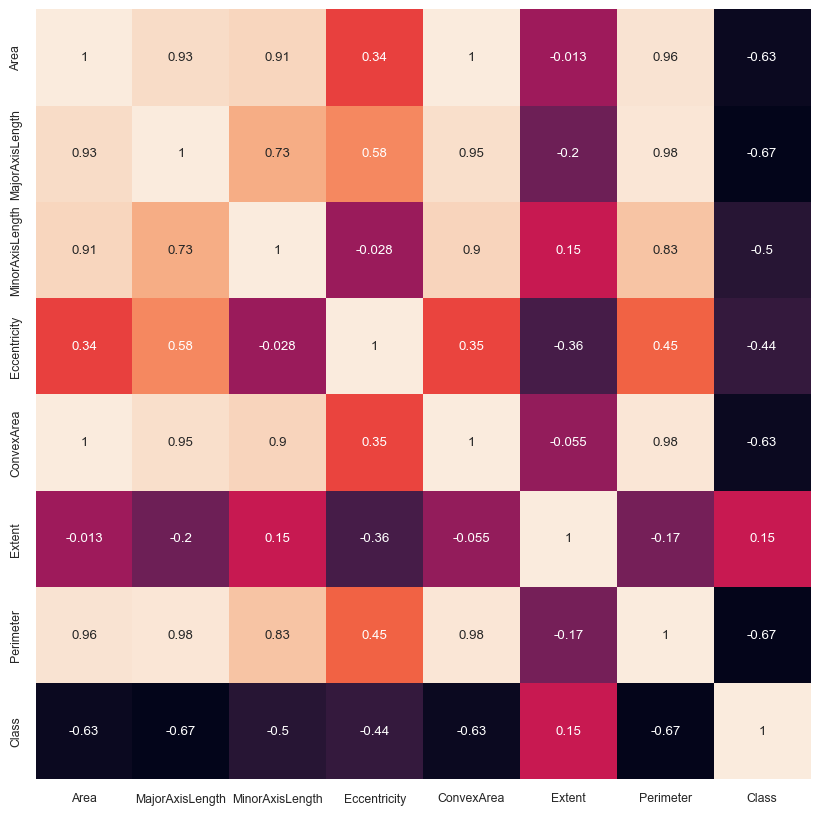

In [11]:
df_corr = data.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['Class'] = label.fit_transform(data['Class'])
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


## Splitting the data into training and test

In [6]:
X = data.iloc[:,0:6].values
y = data.iloc[:, 7].values

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=0)

In [7]:
X

array([[8.75240000e+04, 4.42246011e+02, 2.53291155e+02, 8.19738392e-01,
        9.05460000e+04, 7.58650579e-01],
       [7.51660000e+04, 4.06690687e+02, 2.43032436e+02, 8.01805234e-01,
        7.87890000e+04, 6.84129570e-01],
       [9.08560000e+04, 4.42267048e+02, 2.66328318e+02, 7.98353619e-01,
        9.37170000e+04, 6.37612812e-01],
       ...,
       [9.96570000e+04, 4.31706981e+02, 2.98837323e+02, 7.21684066e-01,
        1.06264000e+05, 7.41098519e-01],
       [9.35230000e+04, 4.76344094e+02, 2.54176054e+02, 8.45738510e-01,
        9.76530000e+04, 6.58798253e-01],
       [8.56090000e+04, 5.12081774e+02, 2.15271976e+02, 9.07345395e-01,
        8.91970000e+04, 6.32019963e-01]])

In [8]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(6,input_shape=(6,),activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(lr=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 2)                 14        
                                                                 
Total params: 140 (560.00 Byte)
Trainable params: 140 (560.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 0s 5ms/step - loss: 10509.4023 - accuracy: 0.5097 - val_loss: 8199.7695 - val_accuracy: 0.4611
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 5919.7373 - accuracy: 0.5097 - val_loss: 4188.6006 - val_accuracy: 0.4611
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 2547.8896 - accuracy: 0.5014 - val_loss: 1014.7927 - val_accuracy: 0.5389
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 557.3588 - accuracy: 0.4903 - val_loss: 374.4243 - val_accuracy: 0.5389
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 285.4692 - accuracy: 0.4903 - val_loss: 184.8915 - val_accuracy: 0.5389
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 137.7846 - accuracy: 0.4903 - val_loss: 77.0244 - val_accuracy: 0.5389
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 42.4186 - accuracy: 0.4903 - val_loss: 39.8796 - va

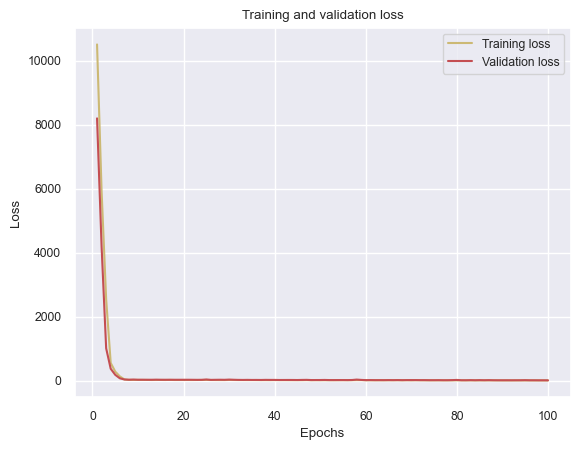

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

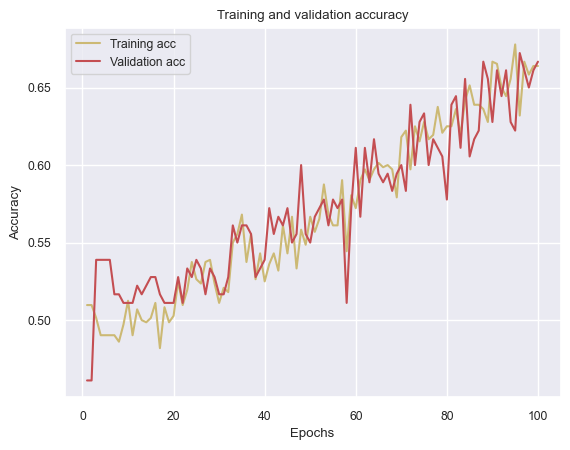

In [13]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.66      0.80      0.72        97
           1       0.69      0.51      0.58        83

    accuracy                           0.67       180
   macro avg       0.67      0.66      0.65       180
weighted avg       0.67      0.67      0.66       180

[[78 19]
 [41 42]]
